In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow
tensorflow.__version__

'1.15.2'

In [ ]:
pip install keras--explain

     |████████████████████████████████| 348kB 8.1MB/s 
     |████████████████████████████████| 276kB 36.3MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp36-none-any.whl size=283846 sha256=5d873bc0412f5a0ffa47899182d24a08a2ffb697a7d59391736bc08c03c238fa
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [ ]:
#import libraries
#upgrade and install essential libraries
!pip install keras
!pip install zipfile36
!pip install pydicom

     |████████████████████████████████| 1.9MB 4.9MB/s 


In [ ]:
pip install innvestigate

In [ ]:
import keras
import numpy as np
import cv2
import os
from PIL import Image
import random
import shutil
import pandas as pd
import csv
import glob
import pydicom as dicom
import zipfile
from keras import optimizers
from keras.models import Sequential,Model
from keras.layers import Dropout, Flatten, Dense,Input,MaxPooling2D
#import tensorflow.keras.applications.ResNet50
#from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications import ResNet50
from keras.applications.xception import Xception
from keras.callbacks import ModelCheckpoint
from keras.applications.imagenet_utils import preprocess_input
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [ ]:
import innvestigate
import innvestigate.utils

In [ ]:
os.mkdir('train')
os.mkdir('train/lung_opacity')
os.mkdir('train/normal')
os.mkdir('test')
os.mkdir('test/Covid')
os.mkdir('test/normal')
os.mkdir('test/lung_opacity')

In [ ]:
archive1 = zipfile.ZipFile('drive/MyDrive/RSNA.zip') #Extract Kaggle Dataset
for file in archive1.namelist():
     archive1.extract(file, './datasets')

In [ ]:
archive2 = zipfile.ZipFile('drive/MyDrive/COVID-19.zip') #Extract Kaggle Dataset
for file in archive2.namelist():
     archive2.extract(file, './datasets')

In [ ]:
rsna_csv = pd.read_csv('datasets/RSNA/stage_2_detailed_class_info.csv')

In [ ]:
Lung_opacity = []
for i in range(len(rsna_csv)):
  if rsna_csv['class'][i] == 'Lung Opacity':
    Lung_opacity.append(rsna_csv['patientId'][i])
distinct_lung_opacity = list(set(Lung_opacity))

In [ ]:
#converting dcim files to png files
for i in range(700):
  s = distinct_lung_opacity[i] + '.dcm'
  ds1 = dicom.dcmread(os.path.join('datasets/RSNA/stage_2_train_images/',s))
  pixel_array_numpy = ds1.pixel_array
  imgname = distinct_lung_opacity[i] + '.png'
  cv2.imwrite(os.path.join('train/lung_opacity', imgname), pixel_array_numpy)

In [ ]:
Normal = []
for i in range(len(rsna_csv)):
  if rsna_csv['class'][i] == 'Normal':
    Normal.append(rsna_csv['patientId'][i])
Normal_new = list(set(Normal))

In [ ]:
#converting dcim files to png files
for i in range(600):
  s = Normal_new[i] + '.dcm'
  ds1 = dicom.dcmread(os.path.join('datasets/RSNA/stage_2_train_images/',s))
  pixel_array_numpy = ds1.pixel_array
  imgname = Normal_new[i] + '.png'
  cv2.imwrite(os.path.join('train/normal', imgname), pixel_array_numpy)

In [ ]:
d2 = glob.glob("train/normal/*")

In [ ]:
#remove the unnecessary file to increase the free space
try:
  #shutil.rmtree('train/COVID-19')
  shutil.rmtree('train/lung_opacity')
  #shutil.rmtree('train/normal')
except:
  pass

In [ ]:
for i in range(2900,3000):
  s = Normal_new[i] + '.dcm'
  ds2 = dicom.dcmread(os.path.join('datasets/RSNA/stage_2_train_images/',s))
  pixel_array_numpy = ds2.pixel_array
  imgname = 'normal'+ str(i) +'.png'
  cv2.imwrite(os.path.join('test/normal', imgname), pixel_array_numpy)

In [ ]:
#converting dcim files to png files
for i in range(2800,3100):
  s = distinct_lung_opacity[i] + '.dcm'
  ds2 = dicom.dcmread(os.path.join('datasets/RSNA/stage_2_train_images/',s))
  pixel_array_numpy = ds2.pixel_array
  imgname = 'lung_opacity' + str(i) + '.png'
  cv2.imwrite(os.path.join('test/lung_opacity', imgname), pixel_array_numpy)

In [ ]:
import glob
d2 = glob.glob("train/COVID-19/*")

In [ ]:
d3 = d2[500:750]

In [ ]:
#moving files to test data 
import shutil
for file_name in d3:
  shutil.move(file_name,'test/Covid')

In [ ]:
d2 = glob.glob("test/Covid/*")
len(d2)

250

In [ ]:
train_datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rescale=1./255,zoom_range=0.05)

In [ ]:
from math import ceil

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/train',
    batch_size = 11,
    #steps_per_epoch = ceil(3893 /17),
    target_size=(300, 300),
    class_mode='categorical')

Found 2193 images belonging to 3 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
    '/content/test',
    batch_size = 11,
    target_size=(300,300),
    class_mode='categorical')

Found 650 images belonging to 3 classes.


In [ ]:
import keras.backend as k 
try:
  os.mkdir('sav-models')
except:
  pass

In [ ]:
try:
  shutil.rmtree('datasets')
except:
  pass

In [ ]:
import keras as keras_standalone
import tensorflow
import tensorflow.keras as keras_tf
print("keras_standalone:", keras_standalone.__version__, " keras_tf:", keras_tf.__version__, " tf:", tensorflow.__version__)

keras_standalone: 2.2.4  keras_tf: 2.2.4-tf  tf: 1.15.2


In [ ]:
%tensorflow_version 1.x

In [ ]:
#full_name='concatenate'
 #Number of classes
visible = Input(shape=(300,300,3))
base_model1 = Xception(weights='imagenet', include_top=False, input_tensor= visible)
features1 = base_model1.output
base_model2 = ResNet50(weights='imagenet', include_top=False, input_tensor= visible)
features2 = base_model2.output













83689472/83683744 [==============================] - 1s 0us/step



/tensorflow-1.15.2/python3.6/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step


In [ ]:
features2.shape

TensorShape([Dimension(None), Dimension(10), Dimension(10), Dimension(2048)])

In [ ]:
merge = keras.layers.concatenate([features1,features2]) #Concatenate the extracted features
conv = keras.layers.Conv2D(1024, (1, 1),padding='same')(merge) #add the concatenated features to a convolutional layer
feature = Flatten(name='flatten')(conv)
dp = Dropout(0.5)(feature) #add dropout
preds = Dense(3, activation='softmax', kernel_initializer=RandomNormal(mean=0.0, stddev=0.001))(dp) 
Concatenated_model = Model(inputs=visible,outputs=preds)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [ ]:
#Concatenated_model.summary()

In [ ]:
for layer in Concatenated_model.layers:
  layer.trainable = True

In [ ]:
full_name = 'combined'
Concatenated_model.compile(optimizer=keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])
filepath="sav-models/%s-{epoch:02d}.hdf5"%full_name 
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', save_best_only=1, mode='max') #creating checkpoint to save the best validation accuracy
callbacks_list = [checkpoint]
history = Concatenated_model.fit_generator(train_generator,validation_data = validation_generator,
                                 validation_steps=68, epochs=10,steps_per_epoch=263, shuffle=True,callbacks=callbacks_list)

Epoch 1/10
263/263 [==============================] - 159s 604ms/step - loss: 0.3956 - acc: 0.8843 - val_loss: 0.2918 - val_acc: 0.9024
Epoch 2/10
263/263 [==============================] - 131s 500ms/step - loss: 0.5458 - acc: 0.8892 - val_loss: 0.5681 - val_acc: 0.8686
Epoch 3/10
263/263 [==============================] - 132s 500ms/step - loss: 0.2289 - acc: 0.9309 - val_loss: 0.1872 - val_acc: 0.9404
Epoch 4/10
263/263 [==============================] - 131s 499ms/step - loss: 0.2815 - acc: 0.9389 - val_loss: 0.5392 - val_acc: 0.8672
Epoch 5/10
263/263 [==============================] - 131s 499ms/step - loss: 0.1245 - acc: 0.9582 - val_loss: 0.3596 - val_acc: 0.9079
Epoch 6/10
263/263 [==============================] - 131s 499ms/step - loss: 0.1312 - acc: 0.9682 - val_loss: 0.2935 - val_acc: 0.9079
Epoch 7/10
263/263 [==============================] - 131s 499ms/step - loss: 0.1053 - acc: 0.9682 - val_loss: 0.6528 - val_acc: 0.8558
Epoch 8/10
263/263 [============================

In [ ]:
glob.glob('sav-models/*')

['sav-models/combined-01.hdf5', 'sav-models/combined-03.hdf5']

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
# dimensions of our images
img_width, img_height = 300, 300

In [ ]:
# load the model we saved
model = keras.models.load_model('/content/sav-models/combined-03.hdf5')

In [ ]:
from keras.optimizers import adam

In [ ]:
model.compile(optimizer=adam(lr=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# predicting images
img1 = image.load_img('/content/test/Covid/COVID-19 (101).png', target_size=(img_width, img_height))
x1 = image.img_to_array(img1)
x2 = np.expand_dims(x1, axis=0)

In [ ]:
model.predict(x2)

array([[1., 0., 0.]], dtype=float32)

In [ ]:
images = np.vstack([x2])
s = model.predict(images)

In [ ]:
np.argmax(s,axis=1)

array([0])

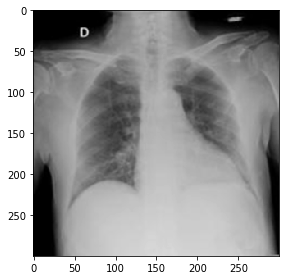

In [ ]:
import numpy as np
import skimage.io
from skimage import transform
Xi = skimage.io.imread("/content/test/Covid/COVID-19 (101).png")
Xi = skimage.transform.resize(Xi, (300,300)) 
Xi = (Xi - 0.5)*2 #Inception pre-processing
skimage.io.imshow(Xi/2+0.5) # Show image before inception preprocessing

In [ ]:
preds = model.predict(x2)
top_pred_classes = preds[0].argsort()[-3:][::-1] # Save ids of top 5 classes
preds[0]

array([1., 0., 0.], dtype=float32)

Expainabale AI method - LIME

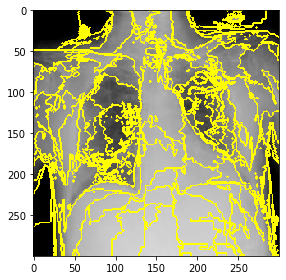

In [ ]:
import skimage.segmentation
superpixels = skimage.segmentation.quickshift(x1, kernel_size=4,max_dist=200, ratio=0.2)
num_superpixels = np.unique(superpixels).shape[0]
skimage.io.imshow(skimage.segmentation.mark_boundaries(Xi/2+0.5, superpixels))

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0
 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1
 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0]


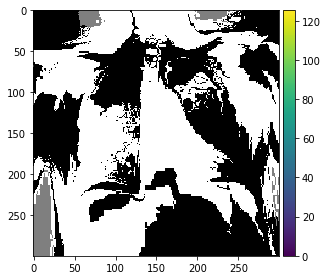

In [ ]:
num_perturb = 150
perturbations = np.random.binomial(1, 0.5, size=(num_perturb, num_superpixels))

#Create function to apply perturbations to images
import copy
def perturb_image(img,perturbation,segments): 
  active_pixels = np.where(perturbation == 1)[0]
  mask = np.zeros(segments.shape)
  for active in active_pixels:
      mask[segments == active] = 1 
  perturbed_image = copy.deepcopy(img)
  perturbed_image = perturbed_image*mask[:,:,np.newaxis]
  return perturbed_image

#Show example of perturbations
print(perturbations[0]) 
skimage.io.imshow(perturb_image(x1/2+0.5,perturbations[1],superpixels))

In [ ]:
predictions = []
for pert in perturbations:
  perturbed_img = perturb_image(x1,pert,superpixels)
  pred = model.predict(perturbed_img[np.newaxis,:,:,:])
  predictions.append(pred)

predictions = np.array(predictions)
print(predictions.shape)

(150, 1, 3)


In [ ]:
#Compute distances to original image
import sklearn.metrics
original_image = np.ones(num_superpixels)[np.newaxis,:] #Perturbation with all superpixels enabled 
distances = sklearn.metrics.pairwise_distances(perturbations,original_image, metric='cosine').ravel()
print(distances.shape)

#Transform distances to a value between 0 an 1 (weights) using a kernel function
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2)) #Kernel function
print(weights.shape)

(150,)
(150,)


In [ ]:
top_pred_classes[0]

0

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


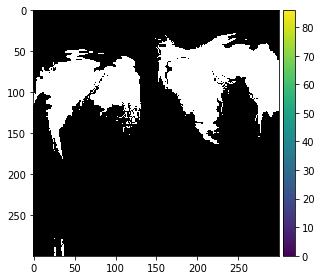

In [ ]:
#Estimate linear model
from sklearn.linear_model import LinearRegression
class_to_explain = top_pred_classes[0] #Labrador class
simpler_model = LinearRegression()
simpler_model.fit(X=perturbations, y=predictions[:,:,class_to_explain], sample_weight=weights)
coeff = simpler_model.coef_[0]

#Use coefficients from linear model to extract top features
num_top_features = 19
top_features = np.argsort(coeff)[-num_top_features:] 

#Show only the superpixels corresponding to the top features
mask = np.zeros(num_superpixels) 
mask[top_features]= True #Activate top superpixels
skimage.io.imshow(perturb_image(x1/2+0.5,mask,superpixels))

Explainable AI method - Deep Taylor Decomposition

In [ ]:
#deep taylor decomposition
import innvestigate
import innvestigate.utils

In [ ]:
model = innvestigate.utils.model_wo_softmax(model)

# Create analyzer
analyzer = innvestigate.create_analyzer("deep_taylor", model)

In [ ]:
x2.shape

(1, 300, 300, 3)

In [ ]:
a = analyzer.analyze(x2)

In [ ]:
a.shape

(1, 300, 300, 3)

In [ ]:
W = a = a.sum(axis=np.argmax(np.asarray(a.shape) == 3))

In [ ]:
W /= np.max(np.abs(W))

In [ ]:
W.shape

(300, 300)

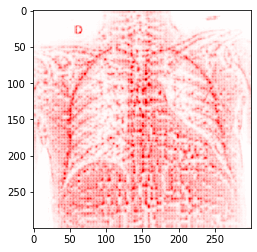

In [ ]:
plt.imshow(W, cmap="seismic", clim=(-1, 1))

Explainable AI method - Layer Wise Relevance Propagation ( In progress)

In [ ]:

weights_layer = []
layer_description = []
for layer in model.layers:
  layer_description.append(layer.get_config())
  weights_layer.append(layer.get_weights())
  #print(layer.get_config(), layer.get_weights())

In [ ]:
layer_description[7]

{'activation': 'linear',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'filters': 64,
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'distribution': 'normal',
   'mode': 'fan_in',
   'scale': 2.0,
   'seed': None}},
 'kernel_regularizer': None,
 'kernel_size': (1, 1),
 'name': 'res2a_branch2a',
 'padding': 'valid',
 'strides': (1, 1),
 'trainable': True,
 'use_bias': True}

In [ ]:
weights = np.array(weights_layer)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
weights_layer[7]

[array([[[[ 0.0827594 , -0.26028505,  0.06575549, ..., -0.02824134,
           -0.1658913 , -0.01760689],
          [ 0.0136976 ,  0.0218186 , -0.02891312, ..., -0.01754489,
            0.0214523 , -0.02278667],
          [-0.03161464, -0.00809424,  0.00359808, ..., -0.00301017,
           -0.00249234,  0.01185599],
          ...,
          [-0.01035775,  0.00857294,  0.01009123, ..., -0.02029509,
            0.00426882,  0.03550098],
          [-0.02192058,  0.01154039, -0.0059851 , ...,  0.01056229,
           -0.01515489,  0.04706977],
          [-0.0173255 ,  0.01695794, -0.26176965, ...,  0.02220934,
           -0.107053  , -0.09214754]]]], dtype=float32),
 array([-1.2344966e-03,  4.8557325e-05,  1.7685333e-04,  8.3367217e-05,
        -1.3882754e-03,  3.6460362e-05,  6.4828258e-04,  3.7275848e-04,
         1.9720262e-03, -5.4997113e-04, -9.6802023e-04,  5.2651772e-05,
        -1.6666554e-05,  2.4605298e-04,  6.0864014e-04, -2.6915214e-04,
        -1.6294273e-04, -1.1796416e-03,  6